In [1]:
import pandas as pd
import numpy as nm

In [50]:


fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\Regressionanaly.xlsx")

data = pd.read_excel(fd,sheet_name='Raw')

In [ ]:
data

In [ ]:
#data = data.rename(columns={'Unnamed: 0': 'month','Unnamed: 1':'year','Unnamed: 2':'unemprate','Unnamed: 3': 's&p500','Unnamed: 4':'pmi','Unnamed: 5':'pmi1'})
data = data.drop([23,24])
data

In [56]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
model = LinearRegression()
x = data[['Unemployment rate change','S&P500change']]
y = data['PMI1change']
model = sm.OLS(y.astype(float),x.astype(float)).fit()
predictions = model.predict(x)
model.summary()
#model.fit(x,y)
#model.score(x, y)
#coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
#print(coeff_df)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             PMI1change   R-squared (uncentered):                   0.202
Model:                            OLS   Adj. R-squared (uncentered):              0.118
Method:                 Least Squares   F-statistic:                              2.406
Date:                Wed, 01 Apr 2020   Prob (F-statistic):                       0.117
Time:                        01:48:56   Log-Likelihood:                         -48.935
No. Observations:                  21   AIC:                                      101.9
Df Residuals:                      19   BIC:                                      104.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Unemployment rate change     0.0883      0.172      0.512      0.614      -0.273       0.449
S&P500change                -0.2836      0.135     -2.096      0.050      -0.567      -0.000
==============================================================================
Omnibus:                        1.405   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                0.978
Skew:                          -0.516   Prob(JB):                        0.613
Kurtosis:                       2.767   Cond. No.                         1.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
import pingouin as pg
pg.corr(x=data['unemprate'].astype(float), y=data['pmi1'].astype(float))

n      r          CI95%     r2  adj_r2     p-val   BF10  power
pearson  21  0.079  [-0.37, 0.49]  0.006  -0.104  0.735021  0.285  0.063

In [2]:
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\finaladspend.xlsx")

adspend = pd.read_excel(fd,sheet_name=0)

In [13]:
adspend.columns = adspend.iloc[2,:]
adspend = adspend.drop([0,1,2,26,27,28,29,30,31])
adspend = adspend.T
adspend.columns = adspend.iloc[0,:]
adspend['date'] = adspend.index
#adspend = adspend.rename(columns={'data':'date'})
s = pd.Series (range(0,124))
adspend = adspend.set_index(s)
adspend = adspend.drop([0,1,123])

MEDIA   Network TV      Spot TV  SLN TV     Cable TV Syndication    Magazines  \
2      2.28347e+06  1.24577e+06  269588  1.37921e+06      322826       983026   
3      2.36469e+06      1383482  257865  1.42221e+06      297896      1268429   
4      2.21044e+06    1.279e+06  271739  1.74982e+06      333494      1795624   
5      2.05252e+06  1.24023e+06  296231  1.65587e+06      321717  1.67493e+06   
6      2.12256e+06  1.26149e+06  318923  1.82016e+06      331236  1.86156e+06   
..             ...          ...     ...          ...         ...          ...   
118    1.64061e+06      1369233  167899  2.83438e+06      294630  1.15233e+06   
119    2.08456e+06   1.5511e+06  171790  3.15122e+06      370949       910749   
120    2.20438e+06  1.46474e+06  184814  3.05113e+06      367684       966158   
121    1.89559e+06  1.49623e+06  187795  3.40002e+06      368815       952280   
122    1.83883e+06  1.28906e+06  152072  2.53302e+06      409632       539796   

MEDIA Sunday Mags Local Mags Hispanic Mags   B-to-B  ... Natl Spot Radio  \
2          144734      25333        2716.6   219550  ...          128090   
3          149801    22538.3        4000.1   212876  ...          125561   
4          158630    29534.6        5001.4   252365  ...          143108   
5          143872    25856.7        7324.4   238711  ...          136540   
6          191584    27941.4        5583.6   247840  ...          198137   
..            ...        ...           ...      ...  ...             ...   
118       70712.6    18126.4         458.4   121825  ...          237395   
119       58041.2    18266.6         292.1   113616  ...          174997   
120       62535.4    21224.7         735.4   117978  ...          184052   
121       67712.7    18165.5         281.5  98050.3  ...          222677   
122       46762.3    16360.3             9  95698.9  ...          111445   

MEDIA   Cinema  Int Display Mobile Web (from Apr 2015) Mobile App  \
2          NaN       845339                        NaN        NaN   
3          NaN       776373                        NaN        NaN   
4          NaN       842919                        NaN        NaN   
5          NaN       860618                        NaN        NaN   
6          NaN       778196                        NaN        NaN   
..         ...          ...                        ...        ...   
118    29496.2       974335                     710343        NaN   
119    29930.3       966515                     723114        NaN   
120      81909       971260                     724522        NaN   
121     107270  1.03014e+06                     721013        NaN   
122    31555.1  1.07017e+06                     774900        NaN   

MEDIA Online Video   Int Search Outdoor  GRAND TOTAL                  date  
2              NaN       799087  235192  1.03813e+07  JAN 2010  DOLS (000)  
3              NaN       986038  245273  1.08833e+07  FEB 2010  DOLS (000)  
4              NaN  1.07688e+06  303951   1.2046e+07  MAR 2010  DOLS (000)  
5              NaN  1.10341e+06  288086  1.15211e+07  APR 2010  DOLS (000)  
6              NaN  1.14979e+06  329487  1.22633e+07  MAY 2010  DOLS (000)  
..             ...          ...     ...          ...                   ...  
118         331341  2.06881e+06  529822  1.32907e+07  SEP 2019  DOLS (000)  
119         340922  2.16827e+06  523692  1.40881e+07  OCT 2019  DOLS (000)  
120         340848  2.23644e+06  508356  1.42375e+07  NOV 2019  DOLS (000)  
121         354485      2087907  477853  1.42068e+07  DEC 2019  DOLS (000)  
122         343590  1.62954e+06  395067  1.18495e+07  JAN 2020  DOLS (000)  

[121 rows x 24 columns]

In [52]:
columns = adspend.columns

In [88]:
adspendchange = pd.DataFrame()

for columns in adspend.columns:
    if columns != 'date':
        adspendchange[columns] =adspend[columns].pct_change()
        adspendchange = adspendchange.fillna(0)
    elif columns == 'date':
        adspendchange['date'] = adspend['date']
        
s = pd.Series(range(0,121))
adspendchange = adspendchange.set_index(s)  

In [90]:
adspendchange['mmyy']  = pd.date_range('2010-1-1','2020-1-31', freq='MS').strftime("%Y-%b").tolist()

In [96]:
adspendchange = adspendchange.set_index('mmyy')

Text(0, 0.5, 'GRAND TOTAL')

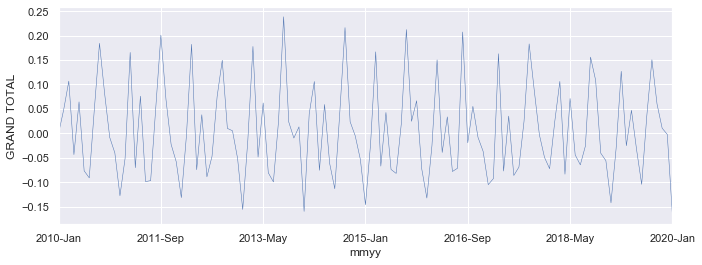

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

sns.set(rc={'figure.figsize':(11, 4)})
adspendchange['GRAND TOTAL'].plot(linewidth=.5).set_ylabel('GRAND TOTAL')

In [104]:
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\Regressionanaly.xlsx")

unemp = pd.read_excel(fd,sheet_name=1)

In [107]:
unemp = unemp.drop(['Unnamed: 3',
       'https://data.bls.gov/timeseries/LNS14000000', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12'],axis=1)

In [111]:
unempchange = pd.DataFrame()
unempchange['ratechange'] = unemp['value'].pct_change()
unempchange = unempchange.fillna(0)
unempchange['mmyy']  = pd.date_range('2010-1-1','2020-2-29', freq='MS').strftime("%Y-%b").tolist()
unempchange = unempchange.set_index('mmyy')

Text(0, 0.5, 'ratechange')

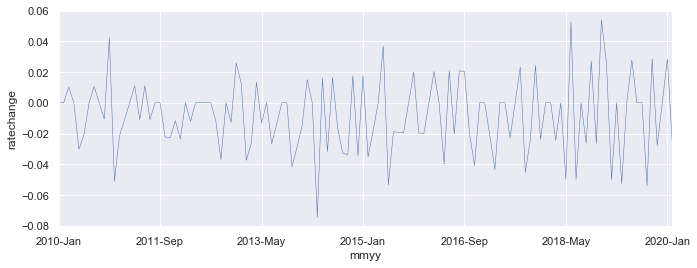

In [120]:
sns.set(rc={'figure.figsize':(11, 4)})
unempchange['ratechange'].plot(linewidth=.5).set_ylabel('ratechange')

In [126]:
import pingouin as pg
pg.corr(x=unempchange['ratechange'].iloc[0:121], y=adspendchange['GRAND TOTAL'])

n      r          CI95%    r2  adj_r2     p-val   BF10  power
pearson  121 -0.097  [-0.27, 0.08]  0.01  -0.007  0.287499  0.199  0.187

In [127]:
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\Regressionanaly.xlsx")

snp = pd.read_excel(fd,sheet_name=0)

In [130]:
snp = snp.drop(['Unnamed: 4',
       'https://finance.yahoo.com/quote/%5EGSPC/history/'],axis=1)

In [ ]:
snpchange = pd.DataFrame()
snpchange['indexchange'] = snp['Close'].pct_change()
snpchange = snpchange.fillna(0)
snpchange['date'] = snp['Date']
snpchange = snpchange.set_index('date')
snpchange

Text(0, 0.5, 'indexratechange')

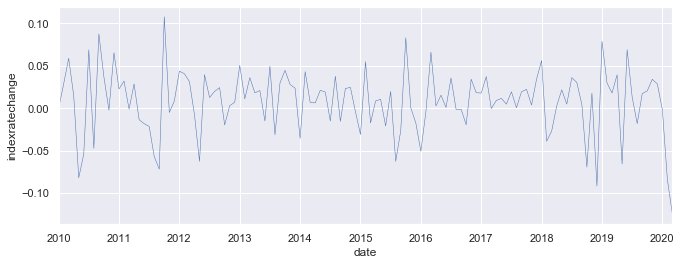

In [140]:
sns.set(rc={'figure.figsize':(11, 4)})
snpchange['indexchange'].plot(linewidth=.5).set_ylabel('indexratechange')

In [142]:
import pingouin as pg
pg.corr(x=snpchange['indexchange'].iloc[0:121], y=adspendchange['GRAND TOTAL'])

n      r          CI95%     r2  adj_r2     p-val   BF10  power
pearson  121 -0.045  [-0.22, 0.13]  0.002  -0.015  0.626385  0.128  0.078

In [169]:
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\phsi.xlsx")

phsi = pd.read_excel(fd,sheet_name=1)

In [170]:
phsi.columns

Index(['Date', 'Index', 'Month', 'Year', 'Item', 'Unnamed: 5'], dtype='object')

In [171]:
phsi = phsi.drop(['Item', 'Unnamed: 5'],axis=1)
phsi = phsi.drop([116,117])

In [172]:
phsichange = pd.DataFrame()
phsichange['indexchange'] = phsi['Index'].pct_change()
phsichange = phsichange.fillna(0)
phsichange['date'] = phsi['Date']
phsichange = phsichange.set_index('date')
phsichange

indexchange
date                
7/2010      0.000000
8/2010      0.049350
9/2010     -0.034877
10/2010     0.076303
11/2010     0.105639
...              ...
10/2019    -0.012891
11/2019     0.012127
12/2019    -0.047005
1/2020      0.053191
2/2020      0.023875

[116 rows x 1 columns]

Text(0, 0.5, 'indexratechange')

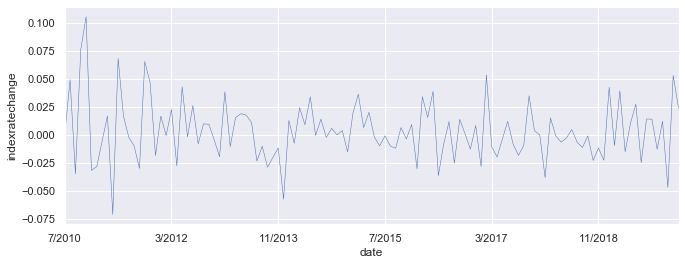

In [173]:
sns.set(rc={'figure.figsize':(11, 4)})
phsichange['indexchange'].plot(linewidth=.5).set_ylabel('indexratechange')

In [174]:
pg.corr(x=phsichange['indexchange'].iloc[0:115], y=adspendchange['GRAND TOTAL'].iloc[6:])

n      r          CI95%   r2  adj_r2     p-val   BF10  power
pearson  115 -0.002  [-0.18, 0.18]  0.0  -0.018  0.983731  0.117   0.05

In [177]:
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\manufaturing index.xlsx")

manu = pd.read_excel(fd,sheet_name=0)

In [181]:
manu = manu.drop(['Item'],axis=1)
manu = manu.drop(123)
manu

Date  Index  Month    Year
0     1/2010   56.7    1.0  2010.0
1     2/2010   55.8    2.0  2010.0
2     3/2010   59.3    3.0  2010.0
3     4/2010   59.0    4.0  2010.0
4     5/2010   58.8    5.0  2010.0
..       ...    ...    ...     ...
118  11/2019   48.1   11.0  2019.0
119  12/2019   47.8   12.0  2019.0
120   1/2020   50.9    1.0  2020.0
121   2/2020   50.1    2.0  2020.0
122   3/2020   49.1    3.0  2020.0

[123 rows x 4 columns]

In [182]:
manuchange = pd.DataFrame()
manuchange['indexchange'] = manu['Index'].pct_change()
manuchange = manuchange.set_index(manu['Date'])
manuchange = manuchange.fillna(0)
manuchange

indexchange
Date                
1/2010      0.000000
2/2010     -0.015873
3/2010      0.062724
4/2010     -0.005059
5/2010     -0.003390
...              ...
11/2019    -0.004141
12/2019    -0.006237
1/2020      0.064854
2/2020     -0.015717
3/2020     -0.019960

[123 rows x 1 columns]

Text(0, 0.5, 'indexratechange')

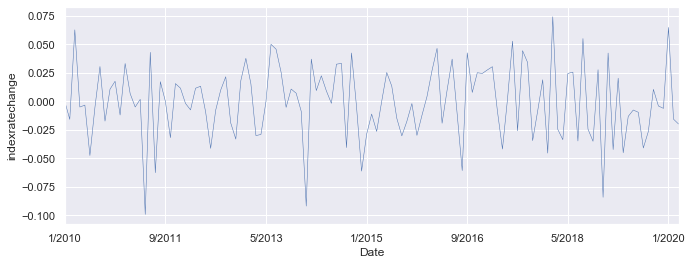

In [183]:
sns.set(rc={'figure.figsize':(11, 4)})
manuchange['indexchange'].plot(linewidth=.5).set_ylabel('indexratechange')

In [185]:
import pingouin as pg
pg.corr(x=manuchange['indexchange'].iloc[0:121], y=adspendchange['GRAND TOTAL'])

n      r          CI95%     r2  adj_r2     p-val   BF10  power
pearson  121 -0.097  [-0.27, 0.08]  0.009  -0.007  0.291557  0.197  0.184